In [1]:
# Librerías

import os
import pandas as pd
!pip install rarfile
import rarfile
import shutil
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [2]:
# Eliminacion de carpetas necesarias para no duplicar el repositorio
folder_to_delete = "/content/ProblemSet2-MachineLearning"

if os.path.exists(folder_to_delete):
    shutil.rmtree(folder_to_delete)
    print(f"Deleted folder: {folder_to_delete}")
else:
    print("Folder does not exist.")


Deleted folder: /content/ProblemSet2-MachineLearning


In [3]:
# Clonación del repositorio y acceso a la carpeta con las bases comprimidas

!git clone https://github.com/carolinabasile/ProblemSet2-MachineLearning.git

%cd /content/ProblemSet2-MachineLearning/stores/

Cloning into 'ProblemSet2-MachineLearning'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 114 (delta 44), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (114/114), 58.35 MiB | 22.34 MiB/s, done.
Resolving deltas: 100% (44/44), done.
/content/ProblemSet2-MachineLearning/stores


In [4]:
# Descomprir las bases

dataframes_dictionary = {}

# Path a los zip files
rar_dir_path = "/content/ProblemSet2-MachineLearning/stores"

dataframes_dict = {}

for file in os.listdir(rar_dir_path):
    if file.endswith('.rar'):
        rar_file_path = os.path.join(rar_dir_path, file)
        print(f"Processing rar file: {file}")

        with rarfile.RarFile(rar_file_path, 'r') as rar_ref:
            # Extracción de las bases en un directorio temporario
            temp_dir = os.path.join(rar_dir_path, 'temp_unzipped')
            rar_ref.extractall(temp_dir)
            print(f"Extracted contents of {file} to {temp_dir}")

            for root, _, files in os.walk(temp_dir):
                for extracted_file in files:
                    if extracted_file.endswith('.csv'):
                        full_path = os.path.join(root, extracted_file)
                        # Muevo las bases a stores
                        dest_path = os.path.join(rar_dir_path, extracted_file)
                        shutil.move(full_path, dest_path)
                        print(f"Moved {extracted_file} to {dest_path}")

                        try:
                            # De .csv a DataFrame
                            df = pd.read_csv(dest_path)
                            dataframes_dict[extracted_file] = df
                            print(f"Loaded DataFrame from: {extracted_file}")
                        except Exception as e:
                            print(f"Error loading {extracted_file}: {e}")

            # Eliminación del directorio temporario
            shutil.rmtree(temp_dir)
            print(f"Cleaned up temporary directory: {temp_dir}")

test_df = dataframes_dict['test_df.csv']

train_df = dataframes_dict['train_df.csv']

Processing rar file: train_df.rar
Extracted contents of train_df.rar to /content/ProblemSet2-MachineLearning/stores/temp_unzipped
Moved train_df.csv to /content/ProblemSet2-MachineLearning/stores/train_df.csv
Loaded DataFrame from: train_df.csv
Cleaned up temporary directory: /content/ProblemSet2-MachineLearning/stores/temp_unzipped
Processing rar file: test_df.rar
Extracted contents of test_df.rar to /content/ProblemSet2-MachineLearning/stores/temp_unzipped
Moved test_df.csv to /content/ProblemSet2-MachineLearning/stores/test_df.csv
Loaded DataFrame from: test_df.csv
Cleaned up temporary directory: /content/ProblemSet2-MachineLearning/stores/temp_unzipped


# Análisis de la base

In [5]:
# Obtención del nombre de todas las variables disponibles
variables_train = train_df.columns.tolist()

print(variables_train)

variables_test = test_df.columns.tolist()

print(variables_test)

['id', 'Clase_x', 'Dominio_x', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130', 'P5140', 'Nper', 'Npersug', 'Ingtotug', 'Ingtotugarr', 'Ingpcug', 'Li', 'Lp', 'Pobre', 'Indigente', 'Npobres', 'Nindigentes', 'Fex_c_x', 'Depto_x', 'Fex_dpto_x', 'Orden', 'Clase_y', 'Dominio_y', 'Estrato1', 'P6020', 'P6040', 'P6050', 'P6090', 'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426', 'P6430', 'P6500', 'P6510', 'P6510s1', 'P6510s2', 'P6545', 'P6545s1', 'P6545s2', 'P6580', 'P6580s1', 'P6580s2', 'P6585s1', 'P6585s1a1', 'P6585s1a2', 'P6585s2', 'P6585s2a1', 'P6585s2a2', 'P6585s3', 'P6585s3a1', 'P6585s3a2', 'P6585s4', 'P6585s4a1', 'P6585s4a2', 'P6590', 'P6590s1', 'P6600', 'P6600s1', 'P6610', 'P6610s1', 'P6620', 'P6620s1', 'P6630s1', 'P6630s1a1', 'P6630s2', 'P6630s2a1', 'P6630s3', 'P6630s3a1', 'P6630s4', 'P6630s4a1', 'P6630s6', 'P6630s6a1', 'P6750', 'P6760', 'P550', 'P6800', 'P6870', 'P6920', 'P7040', 'P7045', 'P7050', 'P7070', 'P7090', 'P7110', 'P7120', 'P7140s1', 'P7140s2', 'P7150', 'P7160', 'P7310', 

In [6]:
# Primer approach para describir los datos

print("Información del DataFrame:")
train_df.info()
#test_df.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543109 entries, 0 to 543108
Columns: 157 entries, id to Fex_dpto_y
dtypes: float64(136), int64(18), object(3)
memory usage: 650.5+ MB


In [7]:
# Corrección de dummies para que tomen valores 1 o 0

columns_to_dummies = ['P6020', 'P6090', 'P6510', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3', 'P6585s4', 'P6590',
                      'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2', 'P6630s3', 'P6630s4', 'P6630s6',
                      'P6920', 'P7040', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310', 'P7422',
                      'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505', 'P7510s1', 'P7510s2', 'P7510s3',
                      'P7510s5', 'P7510s6', 'P7510s7']

# Reemplazo 1 por 1, 2 po 0 y 9 por NA
train_df[columns_to_dummies] = train_df[columns_to_dummies].replace({1: 1, 2: 0, 9: np.nan})
train_df['P6210'] = train_df['P6210'].replace({7: np.nan})

# Check
print(train_df['P6090'].unique())
print(train_df['P6510'].unique())
print(train_df['P6580'].unique())
print(train_df['P6210'].unique())


# Creación de nuevas variables

# Personas por cuarto
train_df['personas_por_cuarto'] = train_df['Nper']/train_df['P5010']

# Mujeres y hombres por hogar
conteo_sexo = train_df.groupby('id')['P6020'].value_counts().unstack(fill_value=0)

conteo_sexo['mujeres_por_hogar'] = conteo_sexo[0]
train_df['mujeres_por_hogar'] = train_df['id'].map(conteo_sexo['mujeres_por_hogar'])

conteo_sexo['hombres_por_hogar'] = conteo_sexo[1]
train_df['hombres_por_hogar'] = train_df['id'].map(conteo_sexo['hombres_por_hogar'])

# Menores en el hogar
train_df['es_menor'] = train_df['P6040'] < 18
conteo_menores = train_df.groupby('id')['es_menor'].sum()

train_df['menores_por_hogar'] = train_df['id'].map(conteo_menores)
train_df = train_df.drop(columns=['es_menor'])

# Maximo nivel educativo alcanzado por hogar
df_temp = train_df.dropna(subset=['P6240'])
df_temp['P6240'] = pd.to_numeric(df_temp['P6240'])

max_nivel_edu_hogar = df_temp.groupby('id')['P6240'].max()
train_df['max_nivel_edu_hogar'] = train_df['id'].map(max_nivel_edu_hogar)

# Subsidios por hogar
train_df['subsidio_alimento'] = train_df['P6585s1'] == 1
conteo_subsidios_alim = train_df.groupby('id')['subsidio_alimento'].sum()
train_df['subsidio_alimento_por_hogar'] = train_df['id'].map(conteo_subsidios_alim).fillna(0).astype(int)

train_df['subsidio_transporte'] = train_df['P6585s2'] == 1
conteo_subsidios_transporte = train_df.groupby('id')['subsidio_transporte'].sum()
train_df['subsidio_transporte_por_hogar'] = train_df['id'].map(conteo_subsidios_transporte).fillna(0).astype(int)

train_df['subsidio_familiar'] = train_df['P6585s3'] == 1
conteo_subsidios_familiar = train_df.groupby('id')['subsidio_familiar'].sum()
train_df['subsidio_familiar_por_hogar'] = train_df['id'].map(conteo_subsidios_familiar).fillna(0).astype(int)

train_df['subsidio_edu'] = train_df['P6585s1'] == 1
conteo_subsidios_edu = train_df.groupby('id')['subsidio_edu'].sum()
train_df['subsidio_edu_por_hogar'] = train_df['id'].map(conteo_subsidios_edu).fillna(0).astype(int)

# Ocupados por desocupados e inactivos
conteo_ocupados = train_df.groupby('id')['Oc'].value_counts().unstack(fill_value=0)
conteo_des = train_df.groupby('id')['Des'].value_counts().unstack(fill_value=0)
conteo_ina = train_df.groupby('id')['Ina'].value_counts().unstack(fill_value=0)
conteo_ocupados['ocupados_por_ina_des'] = conteo_ocupados[1]/(conteo_des[1]+conteo_ina[1])

train_df['ocupados_por_des_ina'] = train_df['id'].map(conteo_ocupados['ocupados_por_ina_des']).fillna(0).astype(int)


variables_descriptions = {
    'P7500s2': 'pensiones_jubilaciones',
    'P7500s3': 'pension_alimenticia',
    'P7510s1': 'dinero_otros_hogares_pais',
    'P7510s2': 'dinero_otros_hogares_extranjero',
    'P7510s3': 'ayudas_instituciones_pais',
    'P7510s5': 'dinero_intereses_dividendos',
    'P7510s6': 'dinero_cesantias'
}

for var, col_name in variables_descriptions.items():
    train_df[col_name] = train_df[var] == 1
    conteo = train_df.groupby('id')[col_name].sum()
    train_df[f'{col_name}_por_hogar'] = train_df['id'].map(conteo).fillna(0).astype(int)

train_df.head()


[ 1. nan  0.]
[ 0. nan  1.]
[ 0. nan  1.]
[ 3.  2.  5.  4.  1.  6. nan  9.]


<ipython-input-7-21a589d15272>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['P6240'] = pd.to_numeric(df_temp['P6240'])
<ipython-input-7-21a589d15272>:87: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'{col_name}_por_hogar'] = train_df['id'].map(conteo).fillna(0).astype(int)


,id,Clase_x,Dominio_x,P5000,P5010,P5090,P5100,P5130,P5140,Nper,...,dinero_otros_hogares_pais,dinero_otros_hogares_pais_por_hogar,dinero_otros_hogares_extranjero,dinero_otros_hogares_extranjero_por_hogar,ayudas_instituciones_pais,ayudas_instituciones_pais_por_hogar,dinero_intereses_dividendos,dinero_intereses_dividendos_por_hogar,dinero_cesantias,dinero_cesantias_por_hogar
0,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,1
1,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,1
2,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,True,1
3,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,1
4,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,1


In [8]:
# Variables a describir
variables = train_df.columns.tolist()
print(variables)

relevant_variables = ['Ingpcug', 'Pobre', 'Indigente', 'personas_por_cuarto', 'mujeres_por_hogar',
                      'hombres_por_hogar', 'menores_por_hogar', 'max_nivel_edu_hogar',
                      'subsidio_alimento_por_hogar', 'subsidio_transporte_por_hogar',
                      'subsidio_familiar_por_hogar', 'subsidio_edu_por_hogar', 'ocupados_por_des_ina',  #Hasta acá primera predicción

                      'pensiones_jubilaciones_por_hogar', 'pension_alimenticia_por_hogar',
                      'dinero_otros_hogares_pais_por_hogar', 'dinero_otros_hogares_extranjero_por_hogar',
                      'ayudas_instituciones_pais_por_hogar', 'dinero_intereses_dividendos_por_hogar',
                      'dinero_cesantias_por_hogar']                                                     #Hasta acá predicción final


numeric_variables = ['Ingtotug', 'Ingtotugarr', 'Ingpcug', 'Impaes',
                     'Isaes', 'Iees', 'Imdies', 'Iof1es', 'Iof2es', 'Iof3hes',
                     'Iof3ies', 'Iof6es', 'Ingtotob', 'Ingtotes']


['id', 'Clase_x', 'Dominio_x', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130', 'P5140', 'Nper', 'Npersug', 'Ingtotug', 'Ingtotugarr', 'Ingpcug', 'Li', 'Lp', 'Pobre', 'Indigente', 'Npobres', 'Nindigentes', 'Fex_c_x', 'Depto_x', 'Fex_dpto_x', 'Orden', 'Clase_y', 'Dominio_y', 'Estrato1', 'P6020', 'P6040', 'P6050', 'P6090', 'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426', 'P6430', 'P6500', 'P6510', 'P6510s1', 'P6510s2', 'P6545', 'P6545s1', 'P6545s2', 'P6580', 'P6580s1', 'P6580s2', 'P6585s1', 'P6585s1a1', 'P6585s1a2', 'P6585s2', 'P6585s2a1', 'P6585s2a2', 'P6585s3', 'P6585s3a1', 'P6585s3a2', 'P6585s4', 'P6585s4a1', 'P6585s4a2', 'P6590', 'P6590s1', 'P6600', 'P6600s1', 'P6610', 'P6610s1', 'P6620', 'P6620s1', 'P6630s1', 'P6630s1a1', 'P6630s2', 'P6630s2a1', 'P6630s3', 'P6630s3a1', 'P6630s4', 'P6630s4a1', 'P6630s6', 'P6630s6a1', 'P6750', 'P6760', 'P550', 'P6800', 'P6870', 'P6920', 'P7040', 'P7045', 'P7050', 'P7070', 'P7090', 'P7110', 'P7120', 'P7140s1', 'P7140s2', 'P7150', 'P7160', 'P7310', 


Estadísticas descriptivas:
count      540297
mean      2285822
std       2521906
min          4000
25%        909357
50%       1610409
75%       2787500
max      85833333
Name: Ingtotug, dtype: int64
Number of zeros in 'Ingtotug': 0
Number of missing values (NA) in 'Ingtotug': 0

Estadísticas descriptivas:
count      541485
mean      2503725
std       2640962
min          4167
25%       1020929
50%       1800000
75%       3050000
max      88833333
Name: Ingtotugarr, dtype: int64
Number of zeros in 'Ingtotugarr': 0
Number of missing values (NA) in 'Ingtotugarr': 0

Estadísticas descriptivas:
count      541485
mean       711049
std        960146
min          2083
25%        266047
50%        460000
75%        804388
max      88833333
Name: Ingpcug, dtype: int64
Number of zeros in 'Ingpcug': 0
Number of missing values (NA) in 'Ingpcug': 0

Estadísticas descriptivas:
count       28322
mean      1265281
std       1711962
min          6667
25%        466818
50%        850000
75%       14000

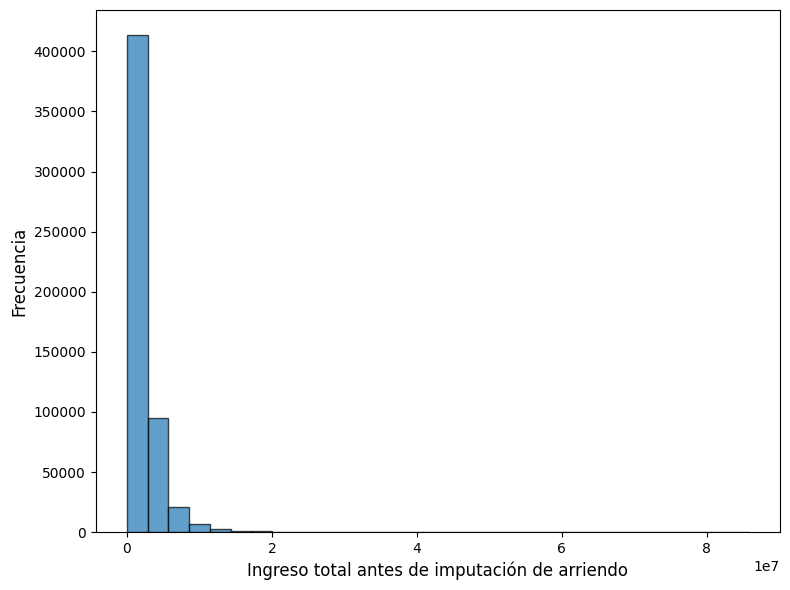

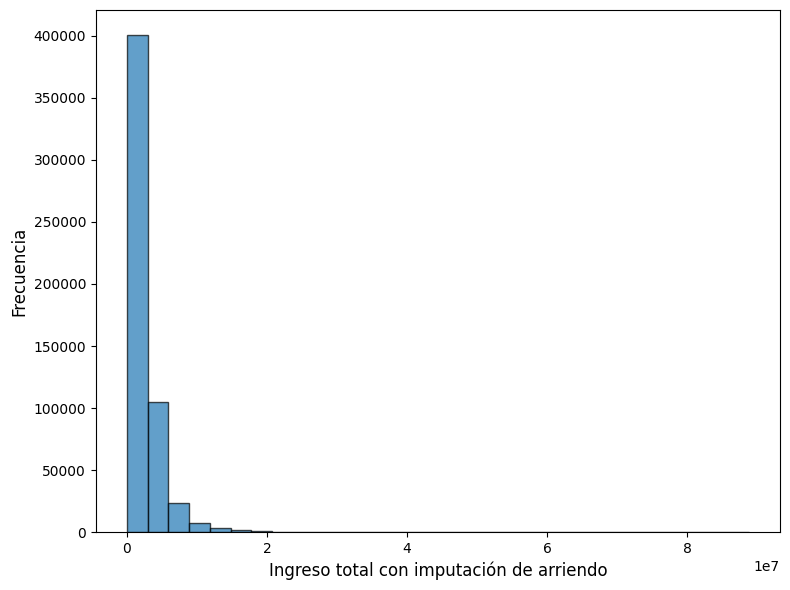

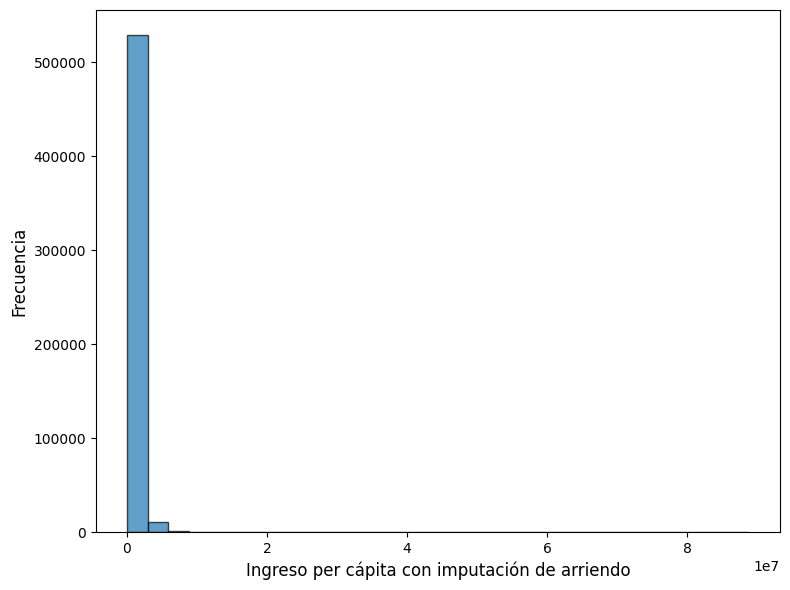

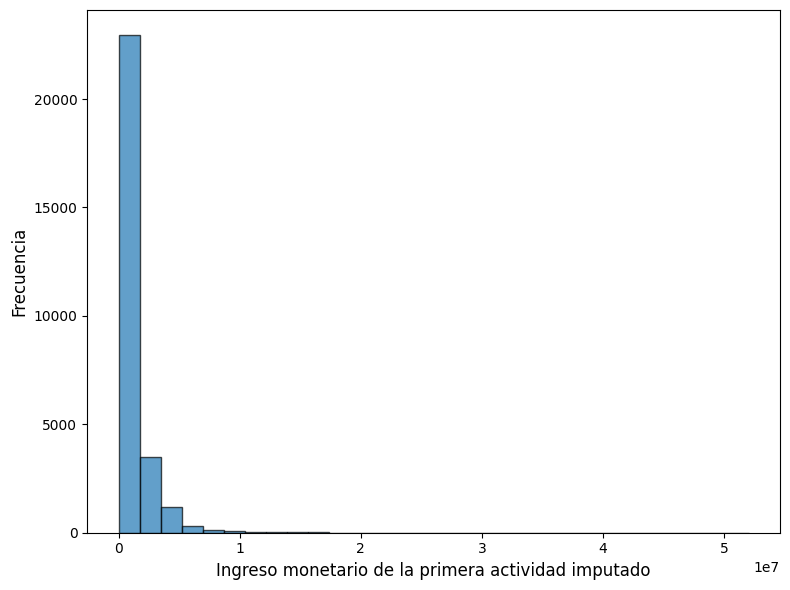

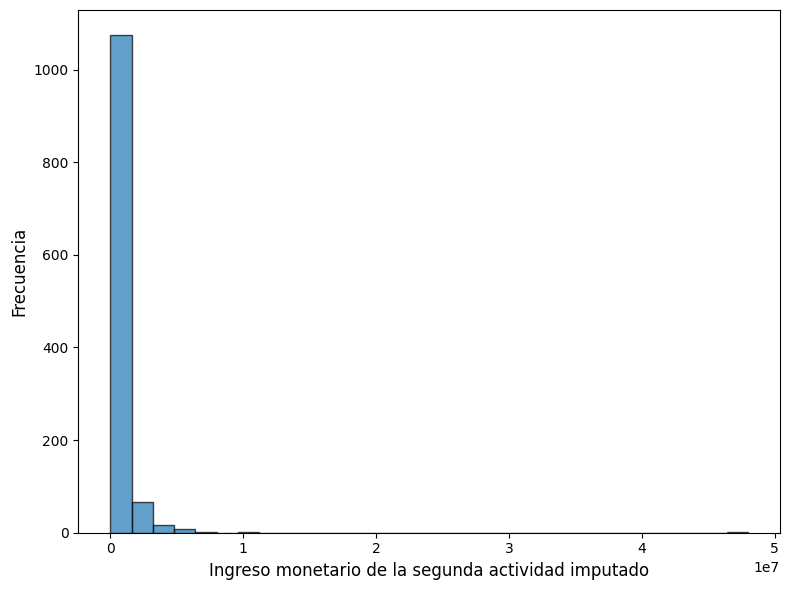

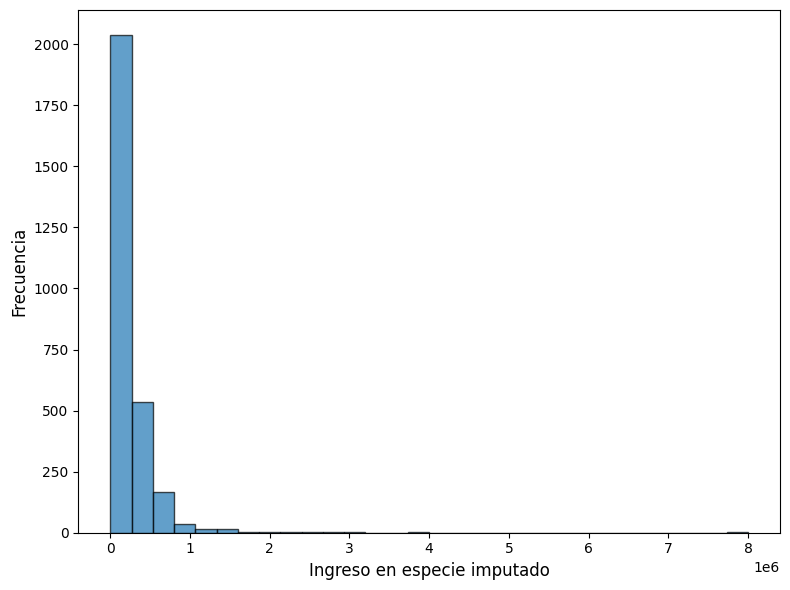

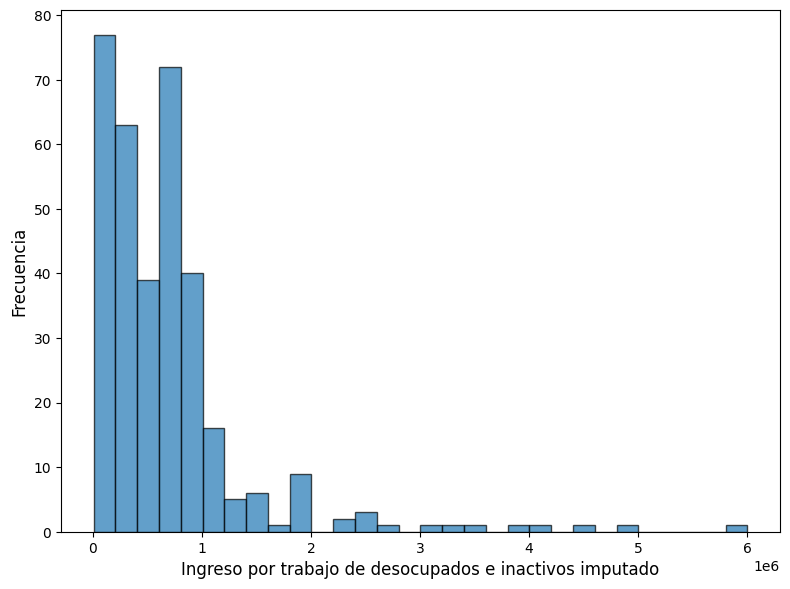

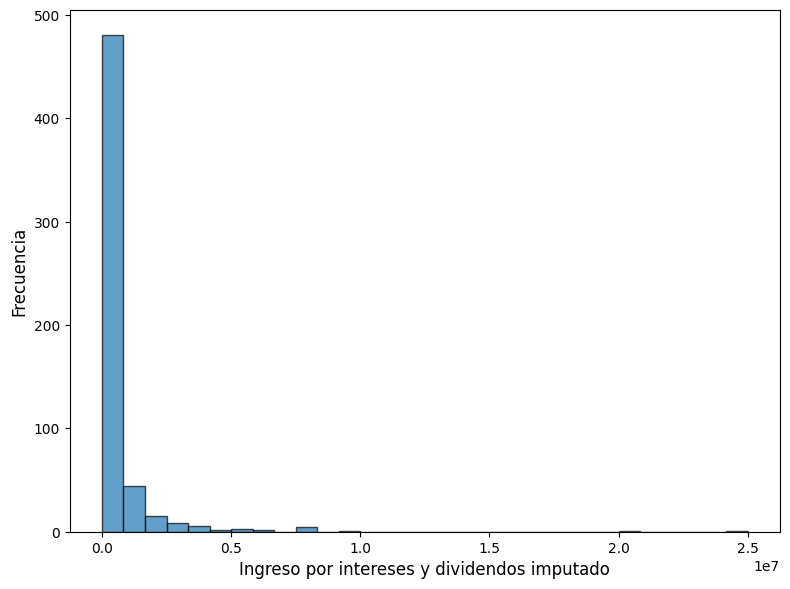

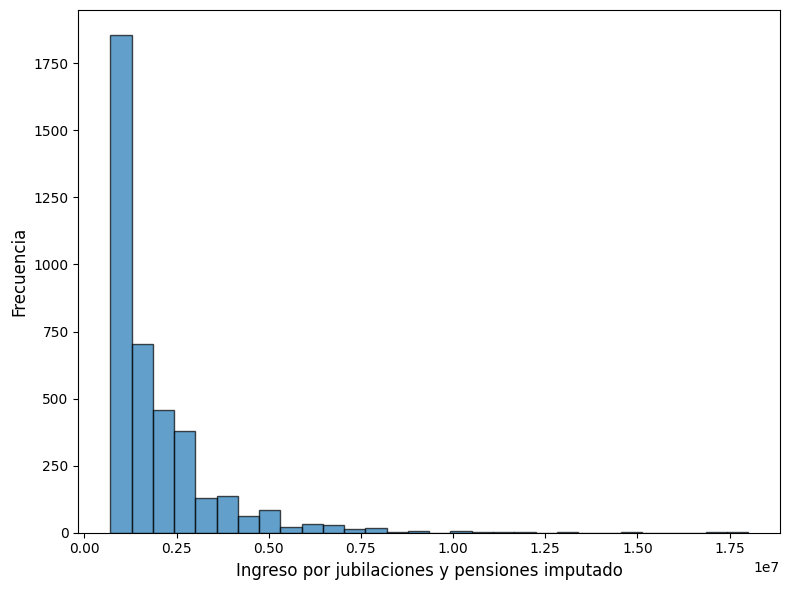

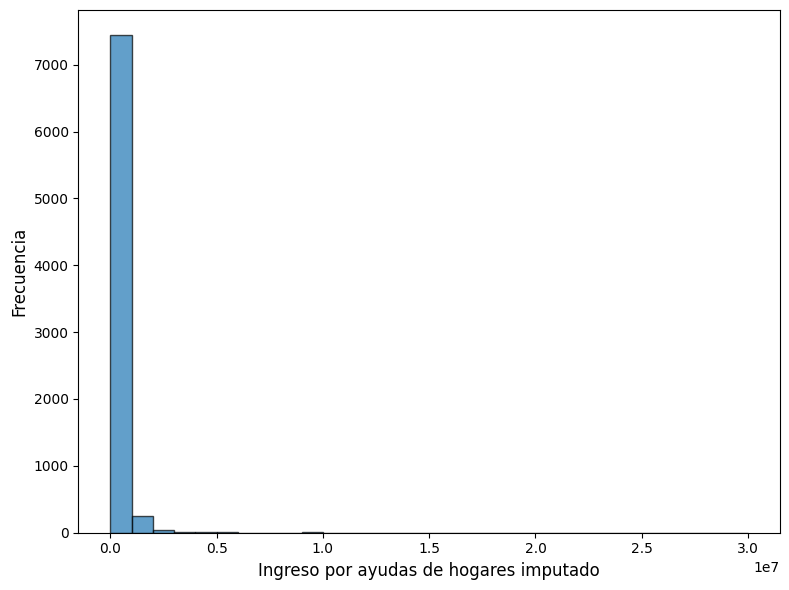

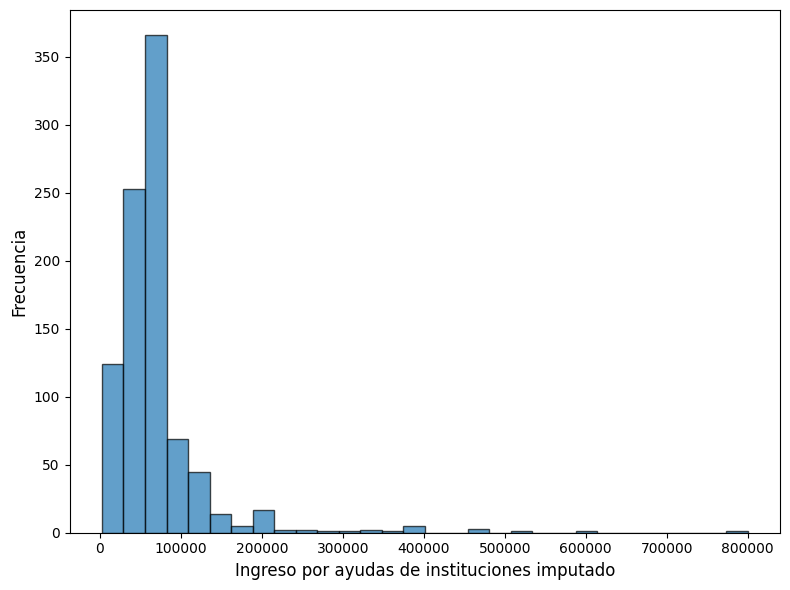

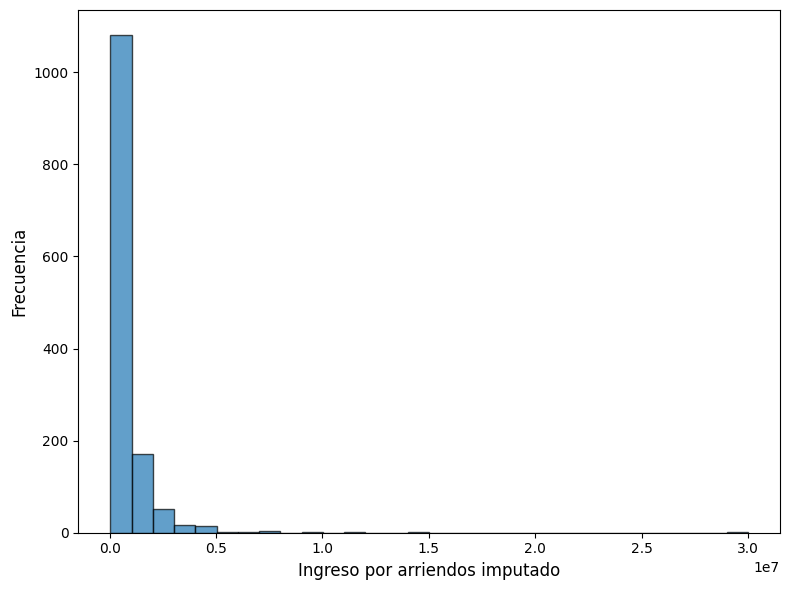

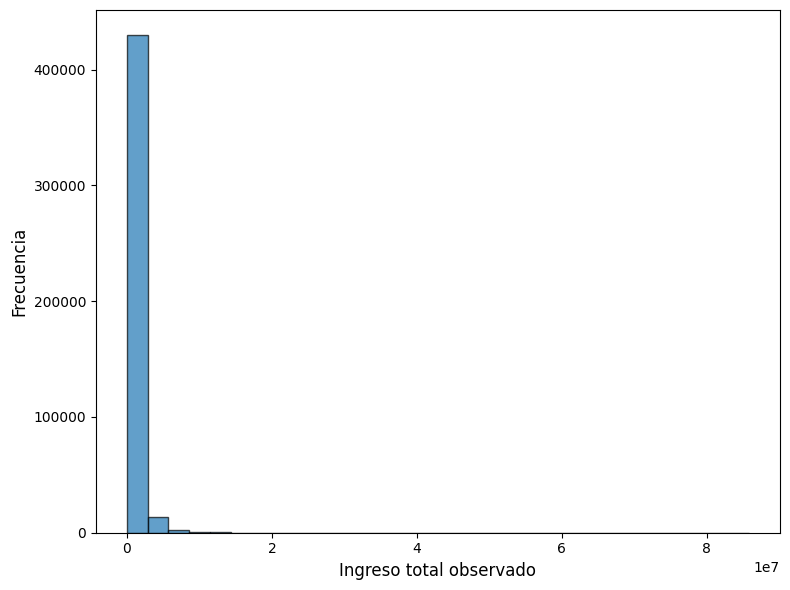

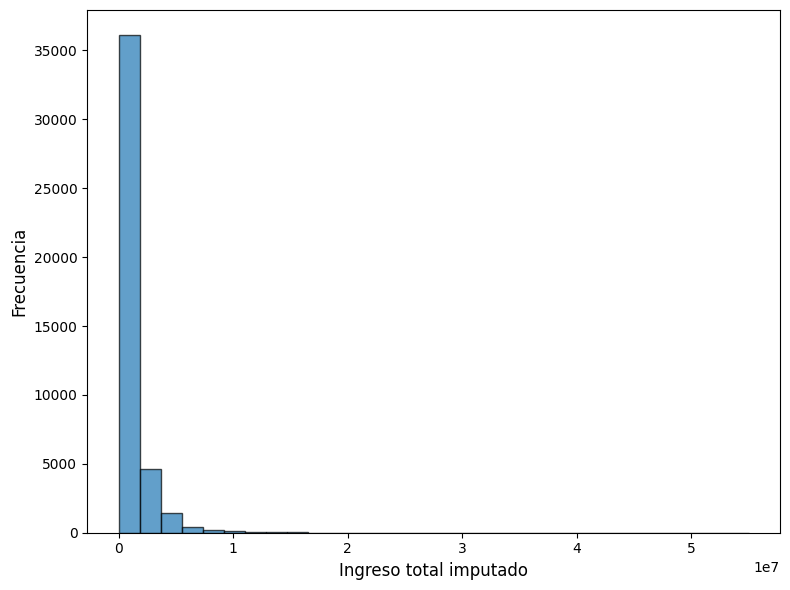

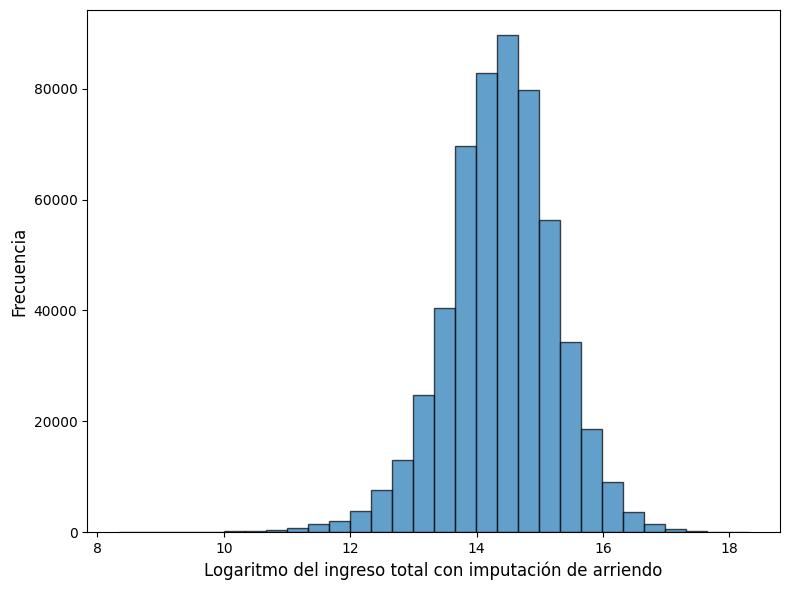

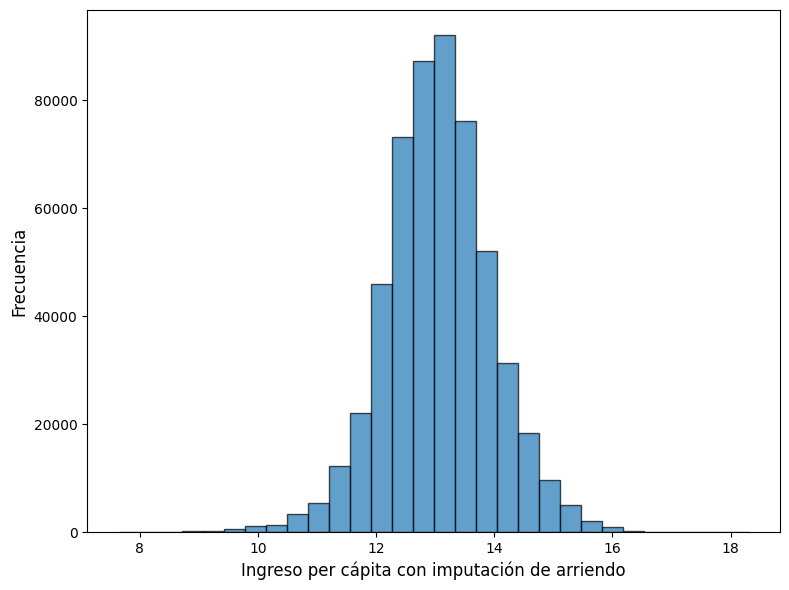

In [9]:
# Analisis variables numéricas:

# Descriptivos

for col in numeric_variables:

  filtered_data = train_df[train_df[col] > 0]

  print("\nEstadísticas descriptivas:")
  print(filtered_data[col].describe().round(0).astype(int))

  zero_count = (filtered_data[col] == 0).sum()
  na_count = filtered_data[col].isna().sum()
  print(f"Number of zeros in '{col}': {zero_count}")
  print(f"Number of missing values (NA) in '{col}': {na_count}")


# Histogramas

# Diccionario con nombres descriptivos para las variables
etiquetas = {
    "Ingtotug": "Ingreso total antes de imputación de arriendo",
    "Ingtotugarr": "Ingreso total con imputación de arriendo",
    "Ingpcug": "Ingreso per cápita con imputación de arriendo",
    "Impaes": "Ingreso monetario de la primera actividad imputado",
    "Isaes": "Ingreso monetario de la segunda actividad imputado",
    "Iees": "Ingreso en especie imputado",
    "Imdies": "Ingreso por trabajo de desocupados e inactivos imputado",
    "Iof1es": "Ingreso por intereses y dividendos imputado",
    "Iof2es": "Ingreso por jubilaciones y pensiones imputado",
    "Iof3hes": "Ingreso por ayudas de hogares imputado",
    "Iof3ies": "Ingreso por ayudas de instituciones imputado",
    "Iof6es": "Ingreso por arriendos imputado",
    "Ingtotob": "Ingreso total observado",
    "Ingtotes": "Ingreso total imputado"
    }



# Gráficos
for col in numeric_variables:
    data = train_df[col].dropna()

    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(etiquetas.get(col, col), fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    save_path = os.path.join('/content/ProblemSet2-MachineLearning/views', f"{col}.png")
    plt.savefig(save_path, dpi=300)


    plt.show()

etiquetas = {
    "Ingtotugarr": "Logaritmo del ingreso total con imputación de arriendo",
    "Ingpcug": "Ingreso per cápita con imputación de arriendo",
}

numeric_variables = ['Ingtotugarr', 'Ingpcug']


# Logaritmo natural
for col in numeric_variables:
    data = train_df[col].dropna()

    # Excluimos valores no positivos para calcular logaritmo natural
    data_log = data[data > 0].apply(np.log)

    plt.figure(figsize=(8, 6))
    plt.hist(data_log, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(etiquetas.get(col, col), fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    save_path = os.path.join('/content/ProblemSet2-MachineLearning/views', f"{col}_log.png")
    plt.savefig(save_path, dpi=300)


    plt.show()

In [10]:
train_df.head()

,id,Clase_x,Dominio_x,P5000,P5010,P5090,P5100,P5130,P5140,Nper,...,dinero_otros_hogares_pais,dinero_otros_hogares_pais_por_hogar,dinero_otros_hogares_extranjero,dinero_otros_hogares_extranjero_por_hogar,ayudas_instituciones_pais,ayudas_instituciones_pais_por_hogar,dinero_intereses_dividendos,dinero_intereses_dividendos_por_hogar,dinero_cesantias,dinero_cesantias_por_hogar
0,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,1
1,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,1
2,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,True,1
3,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,1
4,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,1


In [11]:
# Filtro de base para obtener una observación por hogar y eliminar observaciones por individuo

variables_to_keep = ['id', 'Clase_x', 'Dominio_x', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130', 'P5140', 'Nper',
                      'Npersug', 'Ingtotug', 'Ingtotugarr', 'Ingpcug', 'Li', 'Lp', 'Pobre', 'Indigente', 'Npobres',
                      'Nindigentes', 'personas_por_cuarto', 'mujeres_por_hogar', 'hombres_por_hogar',
                      'menores_por_hogar', 'max_nivel_edu_hogar', 'subsidio_alimento_por_hogar',
                      'subsidio_transporte_por_hogar', 'subsidio_familiar_por_hogar', 'subsidio_edu_por_hogar',
                      'ocupados_por_des_ina',                                                                     # Hasta acá primera predicción

                      'pensiones_jubilaciones_por_hogar', 'pension_alimenticia_por_hogar',
                      'dinero_otros_hogares_pais_por_hogar', 'dinero_otros_hogares_extranjero_por_hogar',
                      'ayudas_instituciones_pais_por_hogar', 'dinero_intereses_dividendos_por_hogar',
                      'dinero_cesantias_por_hogar']                                                               # Hasta acá predicción final


train_df = train_df[variables_to_keep]

# Eliminación de duplicados
train_df = train_df.drop_duplicates()

train_df.head()

,id,Clase_x,Dominio_x,P5000,P5010,P5090,P5100,P5130,P5140,Nper,...,subsidio_familiar_por_hogar,subsidio_edu_por_hogar,ocupados_por_des_ina,pensiones_jubilaciones_por_hogar,pension_alimenticia_por_hogar,dinero_otros_hogares_pais_por_hogar,dinero_otros_hogares_extranjero_por_hogar,ayudas_instituciones_pais_por_hogar,dinero_intereses_dividendos_por_hogar,dinero_cesantias_por_hogar
0,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,400000.0,NaN,5,...,2,0,0,0,0,0,0,0,0,1
5,cf7491d7f2cc9c216bd009e7,1,MEDELLIN,5,4,3,NaN,NaN,250000.0,4,...,0,0,0,1,0,0,0,0,0,0
9,d90a57f64d2a84dbacbed2a5,1,MEDELLIN,4,2,1,NaN,700000.0,NaN,3,...,0,0,0,1,0,0,0,0,0,0
12,db34e387a94a783188ab3a33,1,MEDELLIN,3,1,1,NaN,450000.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
13,97bbef785824746ecab09c6f,1,MEDELLIN,4,3,3,NaN,NaN,500000.0,5,...,0,0,0,0,0,0,0,1,0,0


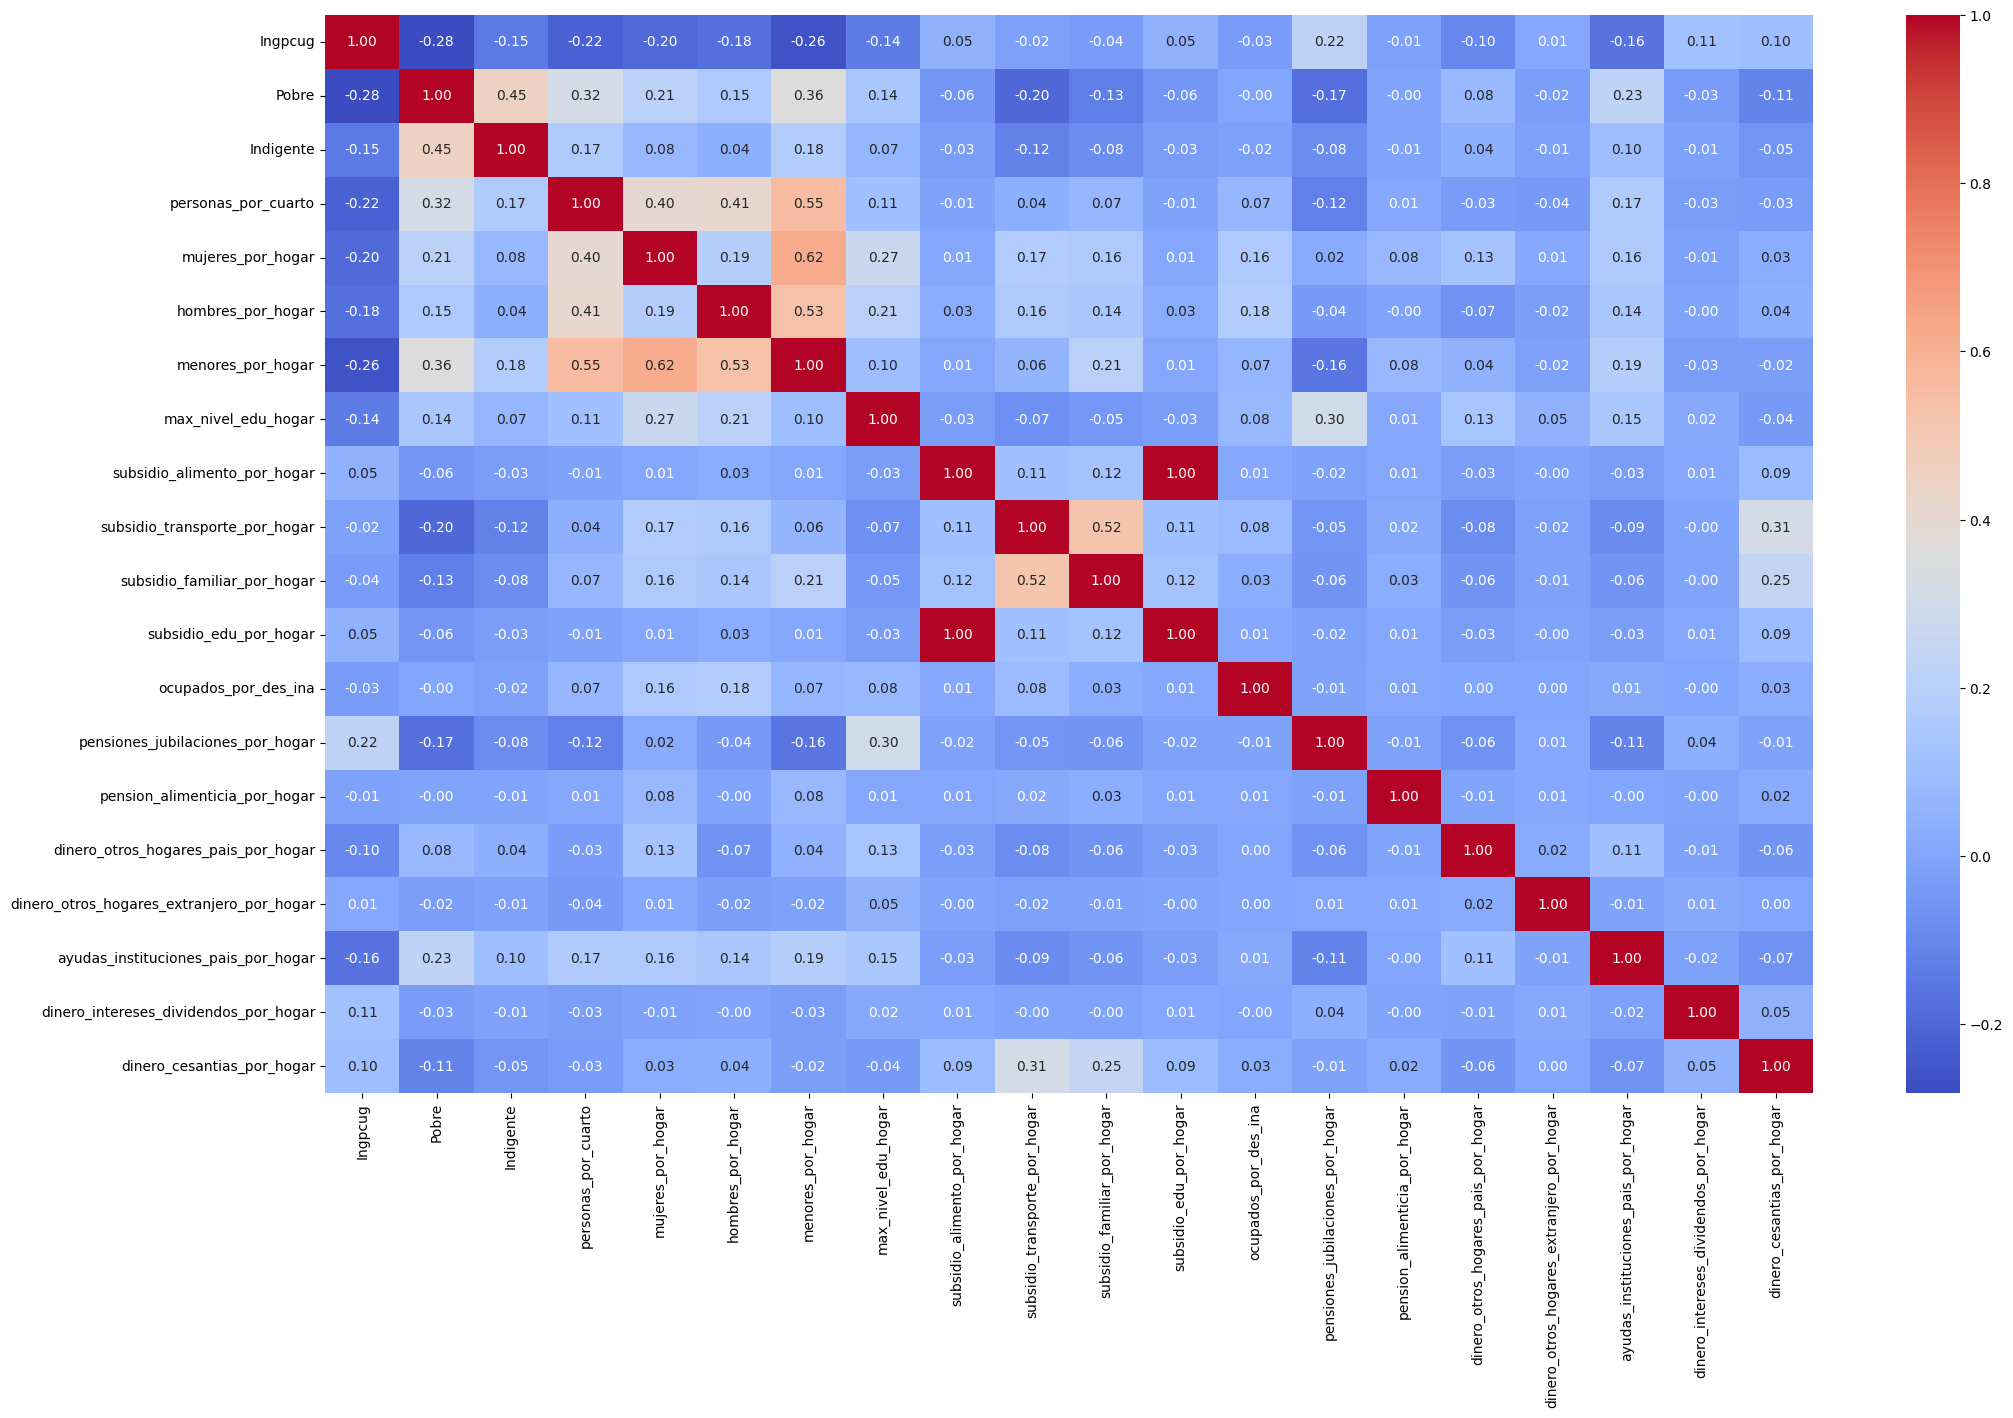

In [12]:
# Cálculo y visualización de la matriz de correlación
corr_matrix = train_df[relevant_variables].corr()

plt.figure(figsize=(24, 14))
sns.heatmap(corr_matrix, cmap="coolwarm", fmt=".2f", cbar=True, annot = True)

save_path = os.path.join('/content/ProblemSet2-MachineLearning/views', f"correlation_matrix.png")
plt.savefig(save_path, dpi=300)


plt.show()


# Modelos

## Regresión lineal

In [13]:
# Definición de variables dependiente e independientes, el train set y el test set

target = "Ingpcug"

X = train_df.drop(columns=[target])
X = X[['personas_por_cuarto', 'mujeres_por_hogar',
       'hombres_por_hogar', 'menores_por_hogar', 'max_nivel_edu_hogar',
       'subsidio_alimento_por_hogar', 'subsidio_transporte_por_hogar',
       'subsidio_familiar_por_hogar', 'subsidio_edu_por_hogar',
       'ocupados_por_des_ina',                                                      # Hasta acá primera predicción

       'pensiones_jubilaciones_por_hogar', 'pension_alimenticia_por_hogar',
       'dinero_otros_hogares_pais_por_hogar', 'dinero_otros_hogares_extranjero_por_hogar',
       'ayudas_instituciones_pais_por_hogar', 'dinero_intereses_dividendos_por_hogar',
       'dinero_cesantias_por_hogar']].dropna()                                      # Hasta acá predicción final


y = train_df[target]
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        train_size=0.7,
                                        random_state = 123
                                        )

X_train.shape


(115471, 17)

In [14]:
# Modelo

# Constante
X = sm.add_constant(X_train)


# Configurar numpy para no usar notación científica
np.set_printoptions(suppress=True)

# Ajuste del modelo
model1 = sm.OLS(y_train, X_train).fit()

# Salida de regresión
print(model1.summary())

# Extract and reformat coefficients
summary_df = model1.summary2().tables[1]
summary_df = summary_df.applymap(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

print(summary_df)

                                 OLS Regression Results                                
Dep. Variable:                Ingpcug   R-squared (uncentered):                   0.336
Model:                            OLS   Adj. R-squared (uncentered):              0.336
Method:                 Least Squares   F-statistic:                              3654.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):                        0.00
Time:                        19:56:36   Log-Likelihood:                     -1.7824e+06
No. Observations:              115471   AIC:                                  3.565e+06
Df Residuals:                  115455   BIC:                                  3.565e+06
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------

<ipython-input-14-56e8e00fb477>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_df = summary_df.applymap(lambda x: f"{x:.6f}" if isinstance(x, float) else x)


In [15]:
# Predicciones basadas en el modelo
y_hat_model1 = model1.predict(X_test)

In [16]:
# Dataframe con las predicciones

predictions_lm = pd.DataFrame(
    {'Predicted': y_hat_model1,
    'Lp': train_df.loc[X_test.index, 'Lp']
})

# Condición de pobreza en base a la diferencia entre el ingreso predicho y la linea de la pobreza
predictions_lm['poverty_lm'] = (predictions_lm['Predicted'] - predictions_lm['Lp'] < 0).astype(int)

predictions_lm.head()

,Predicted,Lp,poverty_lm
333071,2.615863e+05,281732.497580,1
225238,3.883188e+04,291245.749704,1
445538,7.564122e+05,286764.330578,0
211983,1.603986e+06,279360.570093,0
429909,4.297158e+05,170046.136838,0


## Logit

In [17]:
# Definición de variables dependiente e independientes, el train set y el test set

target = "Pobre"

X = train_df.drop(columns=[target])
X = X[['personas_por_cuarto', 'mujeres_por_hogar',
       'hombres_por_hogar', 'menores_por_hogar', 'max_nivel_edu_hogar',
       'subsidio_alimento_por_hogar', 'subsidio_transporte_por_hogar',
       'subsidio_familiar_por_hogar', 'subsidio_edu_por_hogar',
       'ocupados_por_des_ina',                                                     # Hasta acá primera predicción

       'pensiones_jubilaciones_por_hogar', 'pension_alimenticia_por_hogar',
       'dinero_otros_hogares_pais_por_hogar', 'dinero_otros_hogares_extranjero_por_hogar',
       'ayudas_instituciones_pais_por_hogar', 'dinero_intereses_dividendos_por_hogar',
       'dinero_cesantias_por_hogar']].dropna()                                     # Hasta acá predicción final



y = train_df[target]
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(
                                      X,
                                      y,
                                      test_size=0.3,
                                      train_size=0.7,
                                      random_state=123
)

# Estandarización de las variables independientes
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [18]:
# Modelo logistico sobre las variables estandarizadas
logit_model = LogisticRegression(max_iter=500)
logit_model.fit(X_train_scaled, y_train)

# Estandarización de las variables independientes tomando la media y los desvíos del train set
X_test_scaled = scaler.transform(X_test)

In [19]:
# Dataframe para alojar los resultados y comparar modelos
output = pd.DataFrame(y_test)

In [20]:
# Predicciones basadas en el modelo
output['prob_hat_logit'] = logit_model.predict_proba(X_test_scaled)[:, 1]

## CARTs

In [21]:
# Modelo

model_tree = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Training del modelo

model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 32


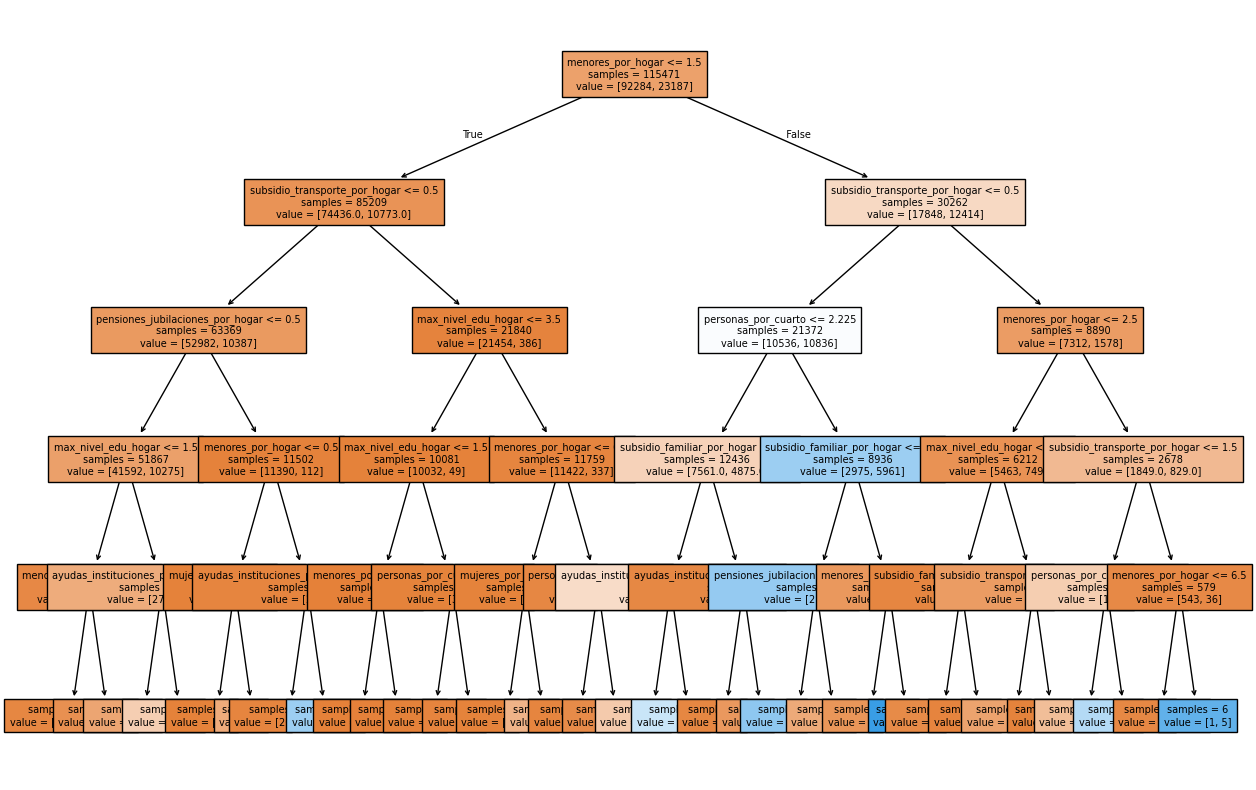

In [22]:
# Estructura del árbol creado

fig, ax = plt.subplots(figsize=(15, 10))

print(f"Profundidad del árbol: {model_tree.get_depth()}")
print(f"Número de nodos terminales: {model_tree.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model_tree,
            feature_names = X_train.columns,
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

In [23]:
# Predicciones basadas en el modelo

output['prob_hat_tree'] = model_tree.predict_proba(X_test)[:, 1]

In [24]:
# Pruning por validación cruzada

param_grid = {'ccp_alpha':np.linspace(0, 0.005, 40)}
param_grid

f1_scorer = make_scorer(f1_score)

# Validación cruzada
grid_tree = GridSearchCV(
        # El árbol se crece lo máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123),
        param_grid = param_grid,
        scoring    = f1_scorer,
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'ccp_alpha': array([0.        , 0.00012821, 0.00025641, 0.00038462, 0.00051282,
       0.00064103, 0.00076923, 0.00089744, 0.00102564, 0.00115385,
       0.00128205, 0.00141026, 0.00153846, 0.00166667, 0.00179487,
       0.00192308, 0.00205128, 0.00217949, 0.00230769, 0.0024359 ,
       0.0025641 , 0.00269231, 0.00282051, 0.00294872, 0.00307692,
       0.00320513, 0.00333333, 0.00346154, 0.00358974, 0.00371795,
       0.00384615, 0.00397436, 0.00410256, 0.00423077, 0.00435897,
       0.00448718, 0.00461538, 0.00474359, 0.00487179, 0.005     ])},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict'))

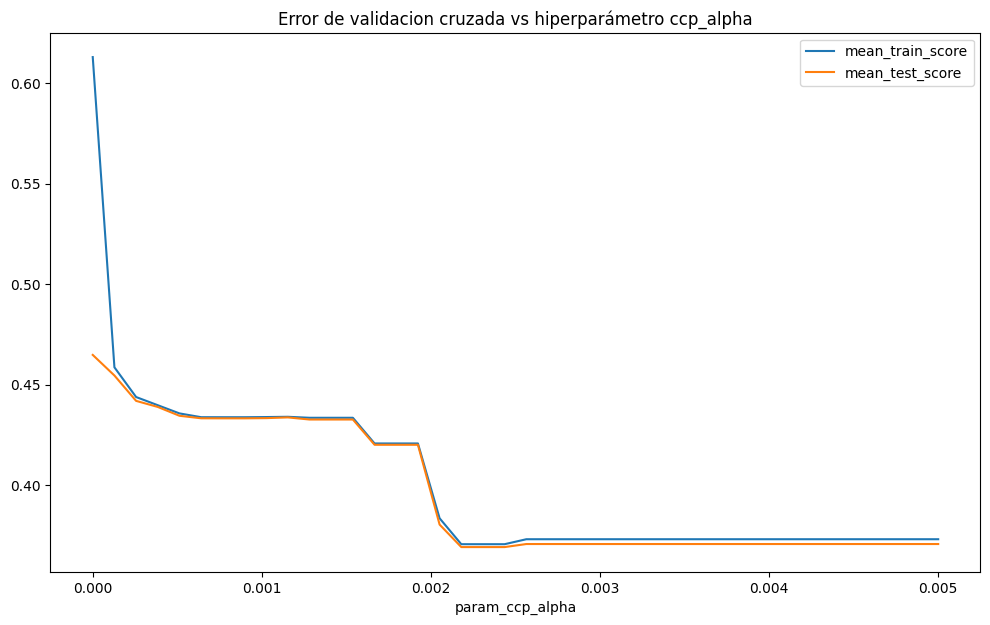

In [25]:
# Gráfico de los scores por fuera y por dentro del training set

fig, ax = plt.subplots(figsize=(12, 7))
scores = pd.DataFrame(grid_tree.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha")
save_path = os.path.join('/content/ProblemSet2-MachineLearning/views', f"scores.png")
plt.savefig(save_path, dpi=300);


In [26]:
# Alpha óptimo

grid_tree.best_params_

{'ccp_alpha': 0.0}

In [27]:
# Estructura del árbol final

model_tree_final = grid_tree.best_estimator_
print(f"Profundidad del árbol: {model_tree_final.get_depth()}")
print(f"Número de nodos terminales: {model_tree_final.get_n_leaves()}")

Profundidad del árbol: 32
Número de nodos terminales: 9877


In [28]:
# Predicciones basadas en el modelo

output['prob_hat_tree_cp'] = model_tree_final.predict_proba(X_test)[:, 1]

## Random Forest

In [29]:
# Definición de hiperparámetros

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': [5, 7, 9],
    'max_depth': [10, 20],
    'criterion': ['gini']
}

# Mejores parámetros y modelo

random_forest_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=123),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=RepeatedKFold(n_splits=3, n_repeats=1, random_state=123),
    refit=True,
    random_state=123,
    verbose=2,
    return_train_score=True
)

random_forest_search.fit(X=X_train, y=y_train)

# Resultados
print("Best parameters:", random_forest_search.best_params_)
model_random_forest_final = random_forest_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=gini, max_depth=10, max_features=7, n_estimators=150; total time=   9.2s
[CV] END criterion=gini, max_depth=10, max_features=7, n_estimators=150; total time=   8.0s
[CV] END criterion=gini, max_depth=10, max_features=7, n_estimators=150; total time=   9.1s
[CV] END criterion=gini, max_depth=20, max_features=5, n_estimators=200; total time=  14.7s
[CV] END criterion=gini, max_depth=20, max_features=5, n_estimators=200; total time=  14.2s
[CV] END criterion=gini, max_depth=20, max_features=5, n_estimators=200; total time=  14.0s
[CV] END criterion=gini, max_depth=20, max_features=7, n_estimators=200; total time=  16.5s
[CV] END criterion=gini, max_depth=20, max_features=7, n_estimators=200; total time=  17.2s
[CV] END criterion=gini, max_depth=20, max_features=7, n_estimators=200; total time=  16.4s
[CV] END criterion=gini, max_depth=10, max_features=9, n_estimators=200; total time=  13.5s
[CV] END criterion=

In [30]:
# Predicciones basadas en el modelo
output['prob_hat_forest'] = model_random_forest_final.predict_proba(X_test)[:, 1]

# Importancia de las variables
importancia_predictores = pd.DataFrame({
    'predictor': X_train.columns,
    'importancia': model_random_forest_final.feature_importances_
}).sort_values('importancia', ascending=False)

print("\nImportancia de las variables:")
print(importancia_predictores)

# Importancia de su permutación
importancia = permutation_importance(
    estimator=model_random_forest_final,
    X=X_train,
    y=y_train,
    n_repeats=5,
    scoring='accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    random_state=123
)

df_importancia = pd.DataFrame({
    'feature': X_train.columns,
    'importances_mean': importancia['importances_mean'],
    'importances_std': importancia['importances_std']
}).sort_values('importances_mean', ascending=False)

print("\nImportancia de su permutación:")
print(df_importancia)


Importancia de las variables:
                                    predictor  importancia
3                           menores_por_hogar     0.302496
0                         personas_por_cuarto     0.171877
6               subsidio_transporte_por_hogar     0.152022
4                         max_nivel_edu_hogar     0.087418
10           pensiones_jubilaciones_por_hogar     0.082583
14        ayudas_instituciones_pais_por_hogar     0.080426
7                 subsidio_familiar_por_hogar     0.071625
1                           mujeres_por_hogar     0.015617
2                           hombres_por_hogar     0.013694
16                 dinero_cesantias_por_hogar     0.009246
12        dinero_otros_hogares_pais_por_hogar     0.006766
9                        ocupados_por_des_ina     0.001979
13  dinero_otros_hogares_extranjero_por_hogar     0.001078
11              pension_alimenticia_por_hogar     0.000961
5                 subsidio_alimento_por_hogar     0.000925
8                      su

# Boosting

In [31]:
# Definición del modelo

model_ada= AdaBoostClassifier(
                DecisionTreeClassifier(max_depth=1),
                                      n_estimators=300
)

In [32]:
# Training del modelo

model_ada.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=300)

In [33]:
# Predicciones basadas en el modelo
output['prob_hat_ada'] = model_ada.predict_proba(X_test)[:, 1]

# Clasificación



\begin{align}
\hat{Y}_i= 1[\hat{p}_i >0.5]
\end{align}

# Regresión lineal

In [34]:
# Clasificación predicha
output['poverty_hat_lm'] = predictions_lm['poverty_lm']

output[['Pobre', 'poverty_hat_lm']].head(10)

,Pobre,poverty_hat_lm
333071,1,1
225238,0,1
445538,0,0
211983,0,0
429909,0,0
158148,0,1
289210,0,0
395777,1,0
279789,0,0
191093,0,0


In [35]:
# Cálculo del accuracy

accuracy = accuracy_score(
            y_true    = output['Pobre'],
            y_pred    = output['poverty_hat_lm'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 77.78047203362432%


In [36]:
# Matriz de confusión de las predicciones de test

confusion_matrix = pd.crosstab(
    output['Pobre'],
    output['poverty_hat_lm'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,35728,3924
1,7072,2764


# Logit

In [37]:
# Definición de la regla de clasificación

rule = 0.5

# Clasificación predicha en base a la regla

output['poverty_hat_logit'] = (output['prob_hat_logit'] > rule).astype(int)

output[['Pobre', 'prob_hat_logit', 'poverty_hat_logit']].head(10)

,Pobre,prob_hat_logit,poverty_hat_logit
333071,1,0.738570,1
225238,0,0.340395,0
445538,0,0.081857,0
211983,0,0.017125,0
429909,0,0.164641,0
158148,0,0.409230,0
289210,0,0.018092,0
395777,1,0.665638,1
279789,0,0.476445,0
191093,0,0.268333,0


In [38]:
# Cálculo del accuracy

accuracy = accuracy_score(
            y_true    = output['Pobre'],
            y_pred    = output['poverty_hat_logit'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 83.89104429356613%


In [39]:
# Matriz de confusión de las predicciones de test

confusion_matrix = pd.crosstab(
    output['Pobre'],
    output['poverty_hat_logit'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,37861,1791
1,6181,3655


## Árbol de decisión

In [40]:
# Clasificación predicha en base a la regla

output['poverty_hat_tree'] = (output['prob_hat_tree'] > rule).astype(int)

output[['Pobre', 'poverty_hat_tree']].head(10)

,Pobre,poverty_hat_tree
333071,1,1
225238,0,1
445538,0,0
211983,0,0
429909,0,0
158148,0,0
289210,0,0
395777,1,1
279789,0,1
191093,0,0


In [41]:
# Cálculo del accuracy

accuracy = accuracy_score(
            y_true    = output['Pobre'],
            y_pred    = output['poverty_hat_tree'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 83.47478176527643%


In [42]:
# Matriz de confusión de las predicciones de test

confusion_matrix = pd.crosstab(
    output['Pobre'],
    output['poverty_hat_tree'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,37997,1655
1,6523,3313


## Trees CP

In [43]:
# Clasificación predicha en base a la regla

output['poverty_hat_tree_cp'] = (output['prob_hat_tree_cp'] > rule).astype(int)

output[['Pobre', 'poverty_hat_tree_cp']].head(10)

,Pobre,poverty_hat_tree_cp
333071,1,1
225238,0,0
445538,0,0
211983,0,0
429909,0,0
158148,0,0
289210,0,0
395777,1,1
279789,0,1
191093,0,0


In [44]:
# Cálculo del accuracy

accuracy = accuracy_score(
            y_true    = output['Pobre'],
            y_pred    = output['poverty_hat_tree_cp'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 82.76551891367603%


In [45]:
# Matriz de confusión de las predicciones de test

confusion_matrix = pd.crosstab(
    output['Pobre'],
    output['poverty_hat_tree_cp'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,37152,2500
1,6029,3807


## Random Forest

In [46]:
# Clasificación predicha en base a la regla

output['poverty_hat_forest'] = (output['prob_hat_forest'] > rule).astype(int)


In [47]:
# Cálculo del accuracy

accuracy = accuracy_score(
            y_true    = output['Pobre'],
            y_pred    = output['poverty_hat_forest'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 84.02036857419981%


In [48]:
# Matriz de confusión de las predicciones de test

confusion_matrix = pd.crosstab(
    output['Pobre'],
    output['poverty_hat_forest'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,37980,1672
1,6236,3600


## AdaBoost

In [49]:
# Clasificación predicha en base a la regla

output['poverty_hat_ada'] = (output['prob_hat_ada'] > rule).astype(int)

In [50]:
# Cálculo del accuracy

accuracy = accuracy_score(
            y_true    = output['Pobre'],
            y_pred    = output['poverty_hat_ada'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 84.05269964435823%


In [51]:
# Matriz de confusión de las predicciones de test

confusion_matrix = pd.crosstab(
    output['Pobre'],
    output['poverty_hat_ada'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,37509,2143
1,5749,4087


# Comparación de modelos

In [52]:
# F1 scores

f1_scores = {}

f1_scores['LinealRegression'] = f1_score(output['Pobre'], output['poverty_hat_lm'])
f1_scores['Logit'] = f1_score(output['Pobre'], output['poverty_hat_logit'])
f1_scores['CART'] = f1_score(output['Pobre'], output['poverty_hat_tree'])
f1_scores['CART CP'] = f1_score(output['Pobre'], output['poverty_hat_tree_cp'])
f1_scores['Forest'] = f1_score(output['Pobre'], output['poverty_hat_forest'])
f1_scores['AdaBoost'] = f1_score(output['Pobre'], output['poverty_hat_ada'])

f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
print(f1_df)

              Model  F1 Score
0  LinealRegression  0.334544
1             Logit  0.478341
2              CART  0.447582
3           CART CP  0.471660
4            Forest  0.476569
5          AdaBoost  0.508776


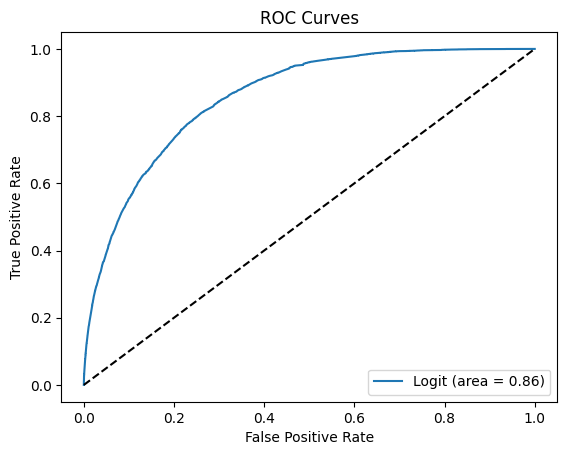

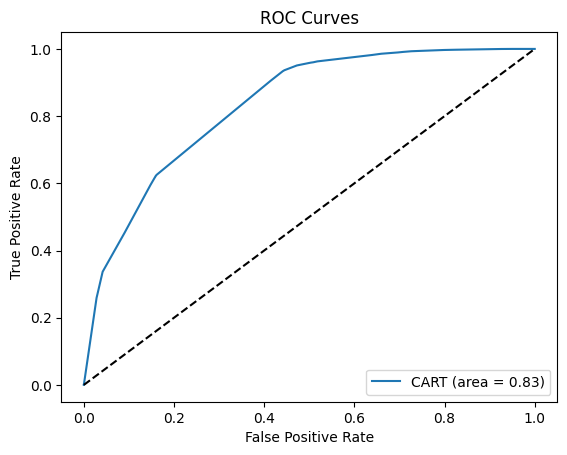

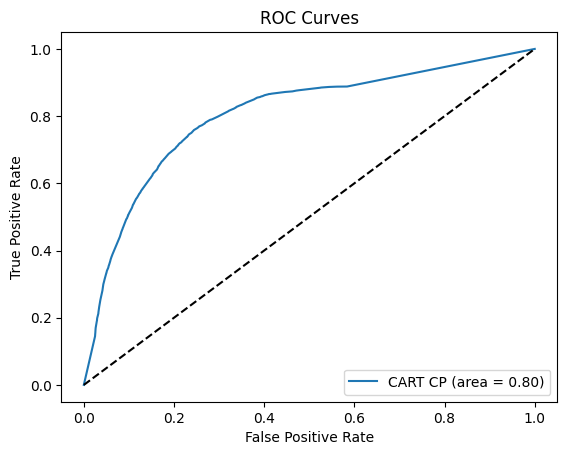

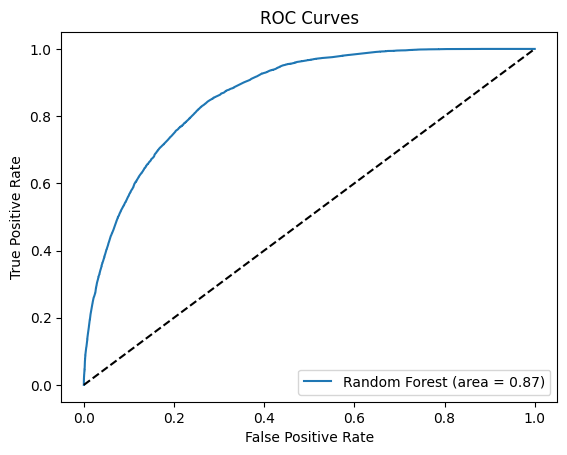

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


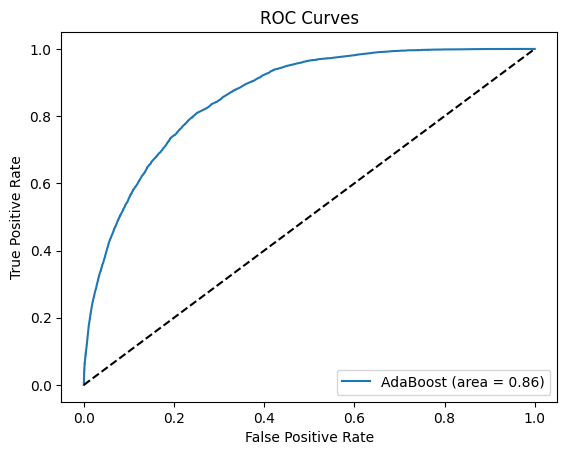

In [53]:
# ROC curves

models = {
    'Logit': logit_model,
    'CART': model_tree,
    'CART CP': model_tree_final,
    'Random Forest': model_random_forest_final,
    'AdaBoost': model_ada
}

auc_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(output['Pobre'], y_pred_prob)
    roc_auc = auc(fpr, tpr)
    auc_scores[name] = roc_auc

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()


In [54]:
# AUC scores

auc_df = pd.DataFrame(list(auc_scores.items()), columns=['Model', 'AUC Score'])
auc_df

,Model,AUC Score
0,Logit,0.858600
1,CART,0.833603
2,CART CP,0.804666
3,Random Forest,0.866682
4,AdaBoost,0.862319


Optimal threshold for Logit: 0.21667254892730536


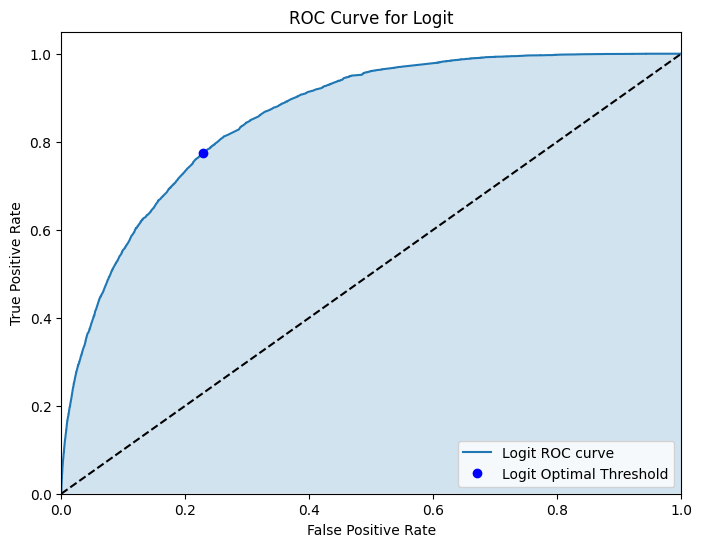

Optimal threshold for Tree: 0.24398625429553264


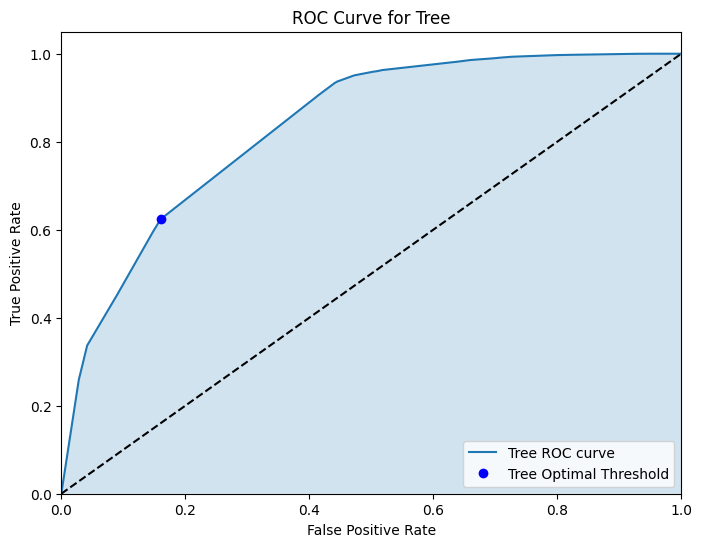

Optimal threshold for Tree with CP: 0.2


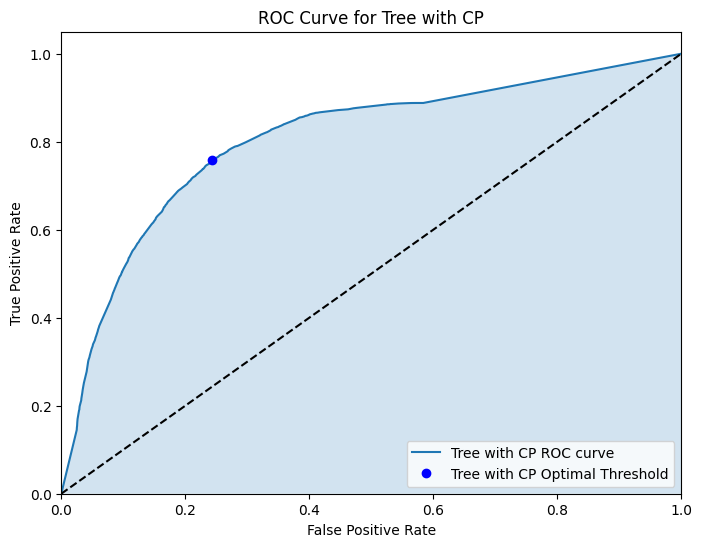

Optimal threshold for Random Forest: 0.2029000436122225


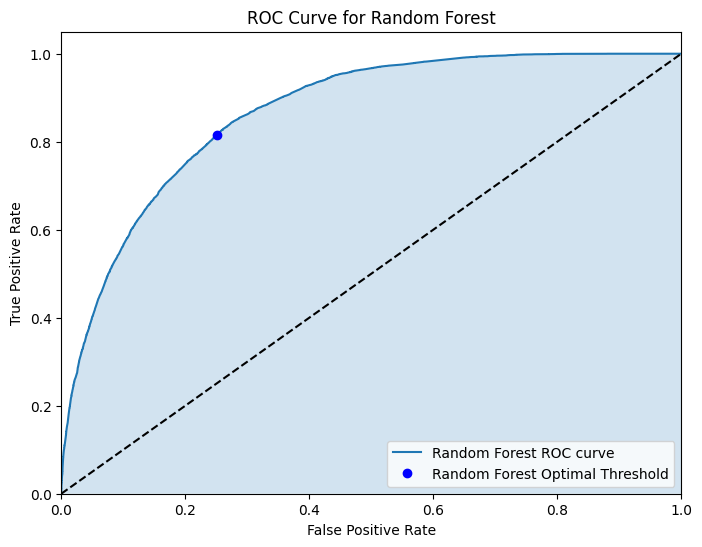

Optimal threshold for AdaBoost: 0.49888395209395725


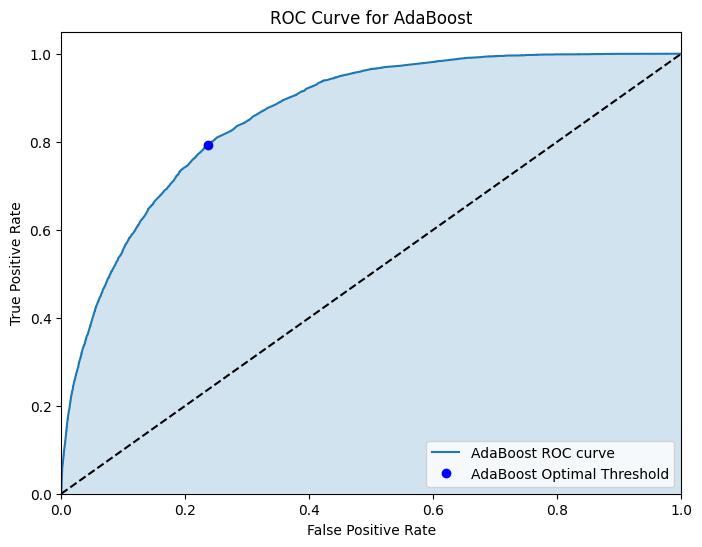

In [55]:
# Umbral óptimo y curva ROC

def plot_optimal_threshold(y_true, prob_pred, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, prob_pred)

    # Cálculo de la distancia euclidiana para cada punto en la curva ROC
    distances = np.sqrt((1 - tpr) ** 2 + fpr ** 2)

    # Índice del umbral óptimo (mínima distancia)
    optimal_idx = np.argmin(distances)
    optimal_threshold = thresholds[optimal_idx]
    print(f"Optimal threshold for {model_name}: {optimal_threshold}")

    # Curva ROC y el umbral óptimo
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve')
    plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'bo', label=f'{model_name} Optimal Threshold')
    plt.fill_between(fpr, tpr, alpha=0.2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")

    save_path = os.path.join('/content/ProblemSet2-MachineLearning/views', f"{model_name}_ROC.png")
    plt.savefig(save_path, dpi=300)

    plt.show()

models = [
    ('Logit', output['prob_hat_logit']),
    ('Tree', output['prob_hat_tree']),
    ('Tree with CP', output['prob_hat_tree_cp']),
    ('Random Forest', output['prob_hat_forest']),
    ('AdaBoost', output['prob_hat_ada'])
]

for model_name, prob_pred in models:
    plot_optimal_threshold(output['Pobre'], prob_pred, model_name)

# Predicciones del test set

In [57]:
# Corrrección de dummies para que tomen valores 1 o 0

columns_to_dummies = ['P6020', 'P6090', 'P6510', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3', 'P6585s4', 'P6590',
                      'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2', 'P6630s3', 'P6630s4', 'P6630s6',
                      'P6920', 'P7040', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310', 'P7422',
                      'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505', 'P7510s1', 'P7510s2', 'P7510s3',
                      'P7510s5', 'P7510s6', 'P7510s7']

# Reemplazo 1 por 1, 2 po 0 y 9 por NA
test_df[columns_to_dummies] = test_df[columns_to_dummies].replace({1: 1, 2: 0, 9: np.nan})
test_df['P6210'] = test_df['P6210'].replace({7: np.nan})

# Check
print(test_df['P6090'].unique())
print(test_df['P6510'].unique())
print(test_df['P6580'].unique())
print(test_df['P6210'].unique())


# Creación de nuevas variables

# Personas por cuarto
test_df['personas_por_cuarto'] = test_df['Nper']/test_df['P5010']

# Mujeres y hombres por hogar
conteo_sexo = test_df.groupby('id')['P6020'].value_counts().unstack(fill_value=0)

conteo_sexo['mujeres_por_hogar'] = conteo_sexo[0]
test_df['mujeres_por_hogar'] = test_df['id'].map(conteo_sexo['mujeres_por_hogar'])

conteo_sexo['hombres_por_hogar'] = conteo_sexo[1]
test_df['hombres_por_hogar'] = test_df['id'].map(conteo_sexo['hombres_por_hogar'])

# Menores en el hogar
test_df['es_menor'] = test_df['P6040'] < 18
conteo_menores = test_df.groupby('id')['es_menor'].sum()

test_df['menores_por_hogar'] = test_df['id'].map(conteo_menores)
test_df = test_df.drop(columns=['es_menor'])

# Maximo nivel educativo alcanzado por hogar
df_temp = test_df.dropna(subset=['P6240'])
df_temp['P6240'] = pd.to_numeric(df_temp['P6240'])

max_nivel_edu_hogar = df_temp.groupby('id')['P6240'].max()
test_df['max_nivel_edu_hogar'] = test_df['id'].map(max_nivel_edu_hogar)

# Subsidios por hogar
test_df['subsidio_alimento'] = test_df['P6585s1'] == 1
conteo_subsidios_alim = test_df.groupby('id')['subsidio_alimento'].sum()
test_df['subsidio_alimento_por_hogar'] = test_df['id'].map(conteo_subsidios_alim).fillna(0).astype(int)

test_df['subsidio_transporte'] = test_df['P6585s2'] == 1
conteo_subsidios_transporte = test_df.groupby('id')['subsidio_transporte'].sum()
test_df['subsidio_transporte_por_hogar'] = test_df['id'].map(conteo_subsidios_transporte).fillna(0).astype(int)

test_df['subsidio_familiar'] = test_df['P6585s3'] == 1
conteo_subsidios_familiar = test_df.groupby('id')['subsidio_familiar'].sum()
test_df['subsidio_familiar_por_hogar'] = test_df['id'].map(conteo_subsidios_familiar).fillna(0).astype(int)

test_df['subsidio_edu'] = test_df['P6585s1'] == 1
conteo_subsidios_edu = test_df.groupby('id')['subsidio_edu'].sum()
test_df['subsidio_edu_por_hogar'] = test_df['id'].map(conteo_subsidios_edu).fillna(0).astype(int)

# Ocupados por desocupados e inactivos
conteo_ocupados = test_df.groupby('id')['Oc'].value_counts().unstack(fill_value=0)
conteo_des = test_df.groupby('id')['Des'].value_counts().unstack(fill_value=0)
conteo_ina = test_df.groupby('id')['Ina'].value_counts().unstack(fill_value=0)
conteo_ocupados['ocupados_por_ina_des'] = conteo_ocupados[1]/(conteo_des[1]+conteo_ina[1])

test_df['ocupados_por_des_ina'] = test_df['id'].map(conteo_ocupados['ocupados_por_ina_des']).fillna(0).astype(int)


variables_descriptions = {
    'P7500s2': 'pensiones_jubilaciones',
    'P7500s3': 'pension_alimenticia',
    'P7510s1': 'dinero_otros_hogares_pais',
    'P7510s2': 'dinero_otros_hogares_extranjero',
    'P7510s3': 'ayudas_instituciones_pais',
    'P7510s5': 'dinero_intereses_dividendos',
    'P7510s6': 'dinero_cesantias'
}

for var, col_name in variables_descriptions.items():
    test_df[col_name] = test_df[var] == 1
    conteo = test_df.groupby('id')[col_name].sum()
    test_df[f'{col_name}_por_hogar'] = test_df['id'].map(conteo).fillna(0).astype(int)

test_df.head()

[ 1. nan  0.]
[nan  0.  1.]
[nan  0.  1.]
[ 6.  5.  3.  4.  1. nan  2.  9.]


<ipython-input-57-9a09f76efc63>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['P6240'] = pd.to_numeric(df_temp['P6240'])


,id,Clase_x,Dominio_x,P5000,P5010,P5090,P5100,P5130,P5140,Nper,...,dinero_otros_hogares_pais,dinero_otros_hogares_pais_por_hogar,dinero_otros_hogares_extranjero,dinero_otros_hogares_extranjero_por_hogar,ayudas_instituciones_pais,ayudas_instituciones_pais_por_hogar,dinero_intereses_dividendos,dinero_intereses_dividendos_por_hogar,dinero_cesantias,dinero_cesantias_por_hogar
0,2a7ddc2779480d7f19834953,1,SANTA MARTA,4,3,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,0
1,2a7ddc2779480d7f19834953,1,SANTA MARTA,4,3,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,0
2,2a7ddc2779480d7f19834953,1,SANTA MARTA,4,3,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,0
3,2a7ddc2779480d7f19834953,1,SANTA MARTA,4,3,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,0
4,2a7ddc2779480d7f19834953,1,SANTA MARTA,4,3,1,NaN,400000.0,NaN,5,...,False,0,False,0,False,0,False,0,False,0


In [58]:
# Filtro de base para obtener una observación por hogar y eliminar observaciones por individuo

variables_to_keep = ['id', 'Clase_x', 'Dominio_x', 'P5000', 'P5010', 'P5090', 'P5100', 'P5130', 'P5140', 'Nper',
                      'Npersug','Li', 'Lp', 'personas_por_cuarto', 'mujeres_por_hogar', 'hombres_por_hogar',
                      'menores_por_hogar', 'max_nivel_edu_hogar', 'subsidio_alimento_por_hogar',
                      'subsidio_transporte_por_hogar', 'subsidio_familiar_por_hogar', 'subsidio_edu_por_hogar',
                      'ocupados_por_des_ina',                                                                     # Hasta acá primera predicción

                      'pensiones_jubilaciones_por_hogar', 'pension_alimenticia_por_hogar',
                      'dinero_otros_hogares_pais_por_hogar', 'dinero_otros_hogares_extranjero_por_hogar',
                      'ayudas_instituciones_pais_por_hogar', 'dinero_intereses_dividendos_por_hogar',
                      'dinero_cesantias_por_hogar']                                                               # Hasta acá predicción final


test_df = test_df[variables_to_keep]

# Eliminación de duplicados
test_df = test_df.drop_duplicates()

test_df.shape

(66168, 30)

In [59]:
# Definición de variables dependiente e independientes

X_test = test_df
X_test = X_test[['personas_por_cuarto', 'mujeres_por_hogar',
               'hombres_por_hogar', 'menores_por_hogar', 'max_nivel_edu_hogar',
               'subsidio_alimento_por_hogar', 'subsidio_transporte_por_hogar',
               'subsidio_familiar_por_hogar', 'subsidio_edu_por_hogar',
               'ocupados_por_des_ina',                                                                     # Hasta acá primera predicción

               'pensiones_jubilaciones_por_hogar', 'pension_alimenticia_por_hogar',
               'dinero_otros_hogares_pais_por_hogar', 'dinero_otros_hogares_extranjero_por_hogar',
               'ayudas_instituciones_pais_por_hogar', 'dinero_intereses_dividendos_por_hogar',
               'dinero_cesantias_por_hogar']]                                                             # Hasta acá predicción final


# Reemplazo de NaN con el valor promedio de cada columna
X_test = X_test.fillna(X_test.mean())

X_test.head()

X_test.shape

(66168, 17)

In [60]:
# Dataframe para alojar los resultados y comparar modelos

output_final = pd.DataFrame(test_df.loc[X_test.index, 'id'])

output_final.head()

,id
0,2a7ddc2779480d7f19834953
5,a0c2e751e582fd49d564f308
11,57273d19e8464a5ff66a582b
13,418d052ff7878940ab938601
18,212a37fc17016a3c78f76852


## Regresión lineal

In [61]:
# Predicciones basadas en el modelo lineal

y_hat_model1_test = model1.predict(X_test)

In [62]:
# Dataframe con las predicciones

predictions_lm_test = pd.DataFrame({
    'Predicted': y_hat_model1,
    'Lp': test_df.loc[X_test.index, 'Lp']
})

# Condición de pobreza en base a la diferencia entre el ingreso predicho y la linea de la pobreza
predictions_lm_test['poverty_lm'] = (predictions_lm_test['Predicted'] - predictions_lm_test['Lp'] < 0).astype(int)

In [63]:
# Clasificación predicha
output_final['poverty_hat_lm'] = predictions_lm_test['poverty_lm']

## Logit

In [64]:
# Reescalamiento de variables independientes
X_test_scaled = scaler.transform(X_test)

# Predicciones basadas en el modelo
output_final['prob_hat_logit'] = logit_model.predict_proba(X_test_scaled)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [65]:
# Definición de la regla de clasificación
rule = 0.5

# Clasificación predicha en base a la regla
output_final['poverty_hat_logit'] = (output_final['prob_hat_logit'] > 0.21667254892730536).astype(int)

## Árbol de decisión

In [66]:
# Predicciones basadas en el modelo
output_final['prob_hat_tree'] = model_tree.predict_proba(X_test)[:, 1]

In [67]:
# Predicciones basadas en el modelo
output_final['prob_hat_tree_cp'] = model_tree_final.predict_proba(X_test)[:, 1]

In [68]:
# Clasificación predicha en base a la regla
output_final['poverty_hat_tree'] = (output_final['prob_hat_tree'] > 0.24398625429553264).astype(int)

In [69]:
# Clasificación predicha en base a la regla
output_final['poverty_hat_tree_cp'] = (output_final['prob_hat_tree_cp'] > 0.2).astype(int)

## Random Forest

In [70]:
# Predicciones basadas en el modelo
output_final['prob_hat_forest'] = model_random_forest_final.predict_proba(X_test)[:, 1]

In [71]:
# Clasificación predicha en base a la regla
output_final['poverty_hat_forest'] = (output_final['prob_hat_forest'] > 0.2029000436122225).astype(int)


## Boosting

In [72]:
# Predicciones basadas en el modelo
output_final['prob_hat_ada'] = model_ada.predict_proba(X_test)[:, 1]

In [73]:
# Clasificación predicha en base a la regla
output_final['poverty_hat_ada'] = (output_final['prob_hat_ada'] > 0.4988839520939572).astype(int)

In [74]:
# Check output final
output_final.shape

(66168, 12)

In [75]:
# Exporto el output
output_final.to_csv('output_2.csv', index=False)